### Step 1 : Data Import and Preprocessing

In [3]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import sys,traceback

In [4]:
'''Function to load the dataset'''
def data_init(data_filepath):
    try:
        hr = pd.read_csv(data_filepath,low_memory= False)

        col_list = list(hr)

        print("Loaded successfully.")
    
        return hr
    except:
        print("File Could not be loaded")
        print("Check your file or filepathname")
        return False

In [5]:
'''User interacive way to access the dataset'''
c = 1
while (c!=0):
    data_filepath = str(input("Enter data filepath:"))
    if os.path.isfile(data_filepath) :
        hr_data = data_init(data_filepath)
    else:
        '''Add double slash in filepath and try again!'''
        data_filepath = re.escape(data_filepath)
        hr_data = data_init(data_filepath)
    if type(hr_data) != str: c = 0
    else: print ("Check if file exists in the filepath and Let's try again ! \n")

Enter data filepath: E:\Downloads\employee.csv


Loaded successfully.


In [6]:
#Import Data
hr = hr_data
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()

Column names:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Sample data:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
#Display data type for each column
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#Check for Missing Values
hr.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [9]:
#Dimensions of our dataset
hr.shape

(1470, 35)

In [10]:
#Summary for each variable
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
#To get the unique values for department
hr['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [19]:
#Combine "Human Resources","Research & Development" into one Department
hr['Department']=np.where(hr['Department'] =='Human Resources', 'Research & Development', hr['Department'])

In [20]:
#Print the updated values of departments
print(hr['Department'].unique())

['Sales' 'Research & Development' 'Research & Developmen']


In [22]:
print(hr.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [23]:
print(hr.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [26]:
# Check for exact match including any leading/trailing spaces
if 'left' in hr.columns:
    print("Column 'left' exists!")
    print(hr['left'].value_counts())
else:
    print("Column 'left' not found in DataFrame.")


Column 'left' not found in DataFrame.


In [30]:
import pandas as pd

# Sample DataFrame
data = {
    'Department': ['HR', 'Engineering', 'HR', 'Engineering'],
    'Salary': ['50000', '80000', '55000', 'NaN'],  # 'Salary' should be numeric
    'Age': [35, 40, 30, 'thirty-five'],            # Mixed types in 'Age'
    'left': [1, 0, 1, 1]                           # Target column for value counts
}

hr = pd.DataFrame(data)

# Convert columns to numeric where expected
hr['Salary'] = pd.to_numeric(hr['Salary'], errors='coerce')
hr['Age'] = pd.to_numeric(hr['Age'], errors='coerce')

# Print column types to inspect
print("Column Types:", hr.dtypes)

# Check available columns
print("Columns in DataFrame:", hr.columns)

# Check if 'left' column exists
if 'left' in hr.columns:
    print("Column 'left' value counts:")
    print(hr['left'].value_counts())
else:
    print("Column 'left' not found in DataFrame.")

# Group by 'Department' and calculate mean for numeric columns
numeric_cols = hr.select_dtypes(include=['number']).columns
print("Numeric Columns for aggregation:", numeric_cols)

grouped_means = hr.groupby('Department')[numeric_cols].mean()
print("Grouped Means:")
print(grouped_means)


Column Types: Department     object
Salary        float64
Age           float64
left            int64
dtype: object
Columns in DataFrame: Index(['Department', 'Salary', 'Age', 'left'], dtype='object')
Column 'left' value counts:
left
1    3
0    1
Name: count, dtype: int64
Numeric Columns for aggregation: Index(['Salary', 'Age', 'left'], dtype='object')
Grouped Means:
              Salary   Age  left
Department                      
Engineering  80000.0  40.0   0.5
HR           52500.0  32.5   1.0


In [33]:
import pandas as pd

# Load the CSV file
file_path = '"E:\Downloads\employee.csv"'
data = pd.read_csv("E:\Downloads\employee.csv")

# Display the first few rows
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
# Check the data types of each column
data.dtypes

# Display summary statistics
data.describe(include='all')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [37]:
# Example to convert 'MonthlyIncome' to numeric (if it was stored as a string)
data['MonthlyIncome'] = pd.to_numeric(data['MonthlyIncome'], errors='coerce')


In [38]:
# Convert 'MonthlyIncome' to numeric
data['MonthlyIncome'] = pd.to_numeric(data['MonthlyIncome'], errors='coerce')


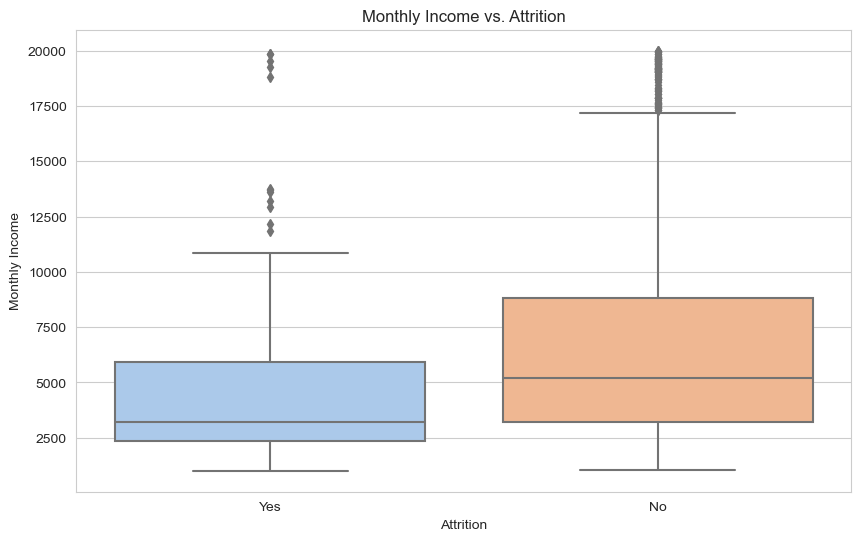

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of Monthly Income vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='pastel')
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


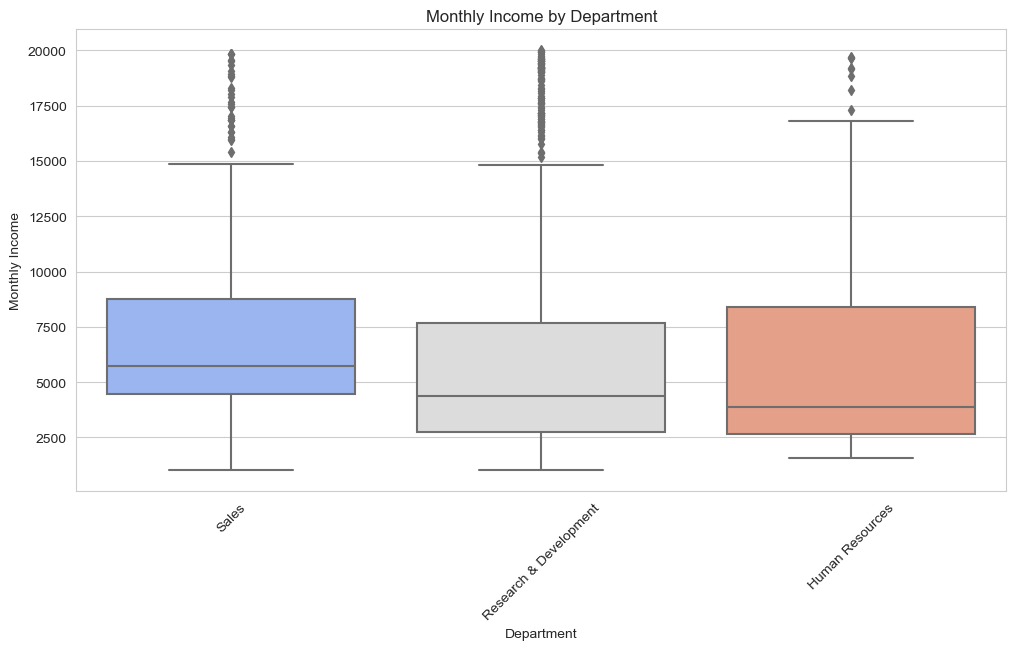

In [40]:
# Box plot of Monthly Income by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='MonthlyIncome', data=data, palette='coolwarm')
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()


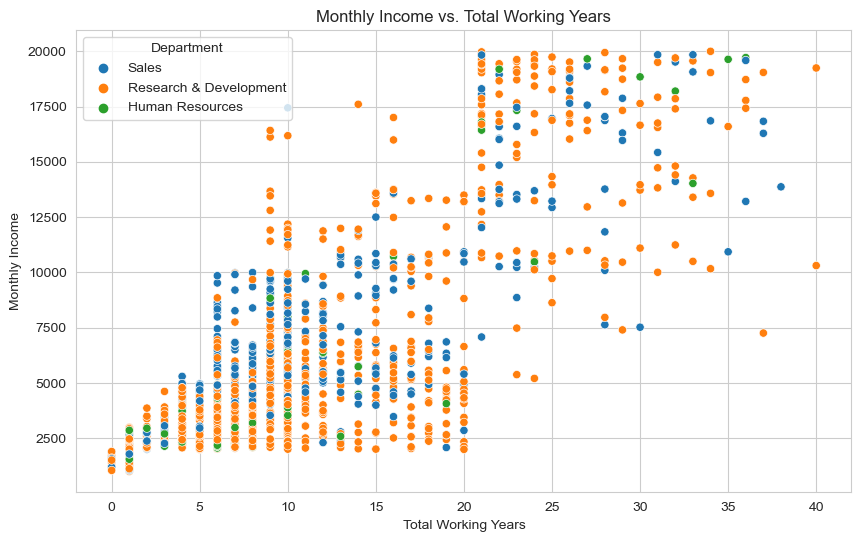

In [41]:
# Scatter plot of Monthly Income vs Total Working Years
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=data, hue='Department', palette='tab10')
plt.title('Monthly Income vs. Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.legend(title='Department', loc='upper left')
plt.show()


In [ ]:
#Histogram of numeric variables

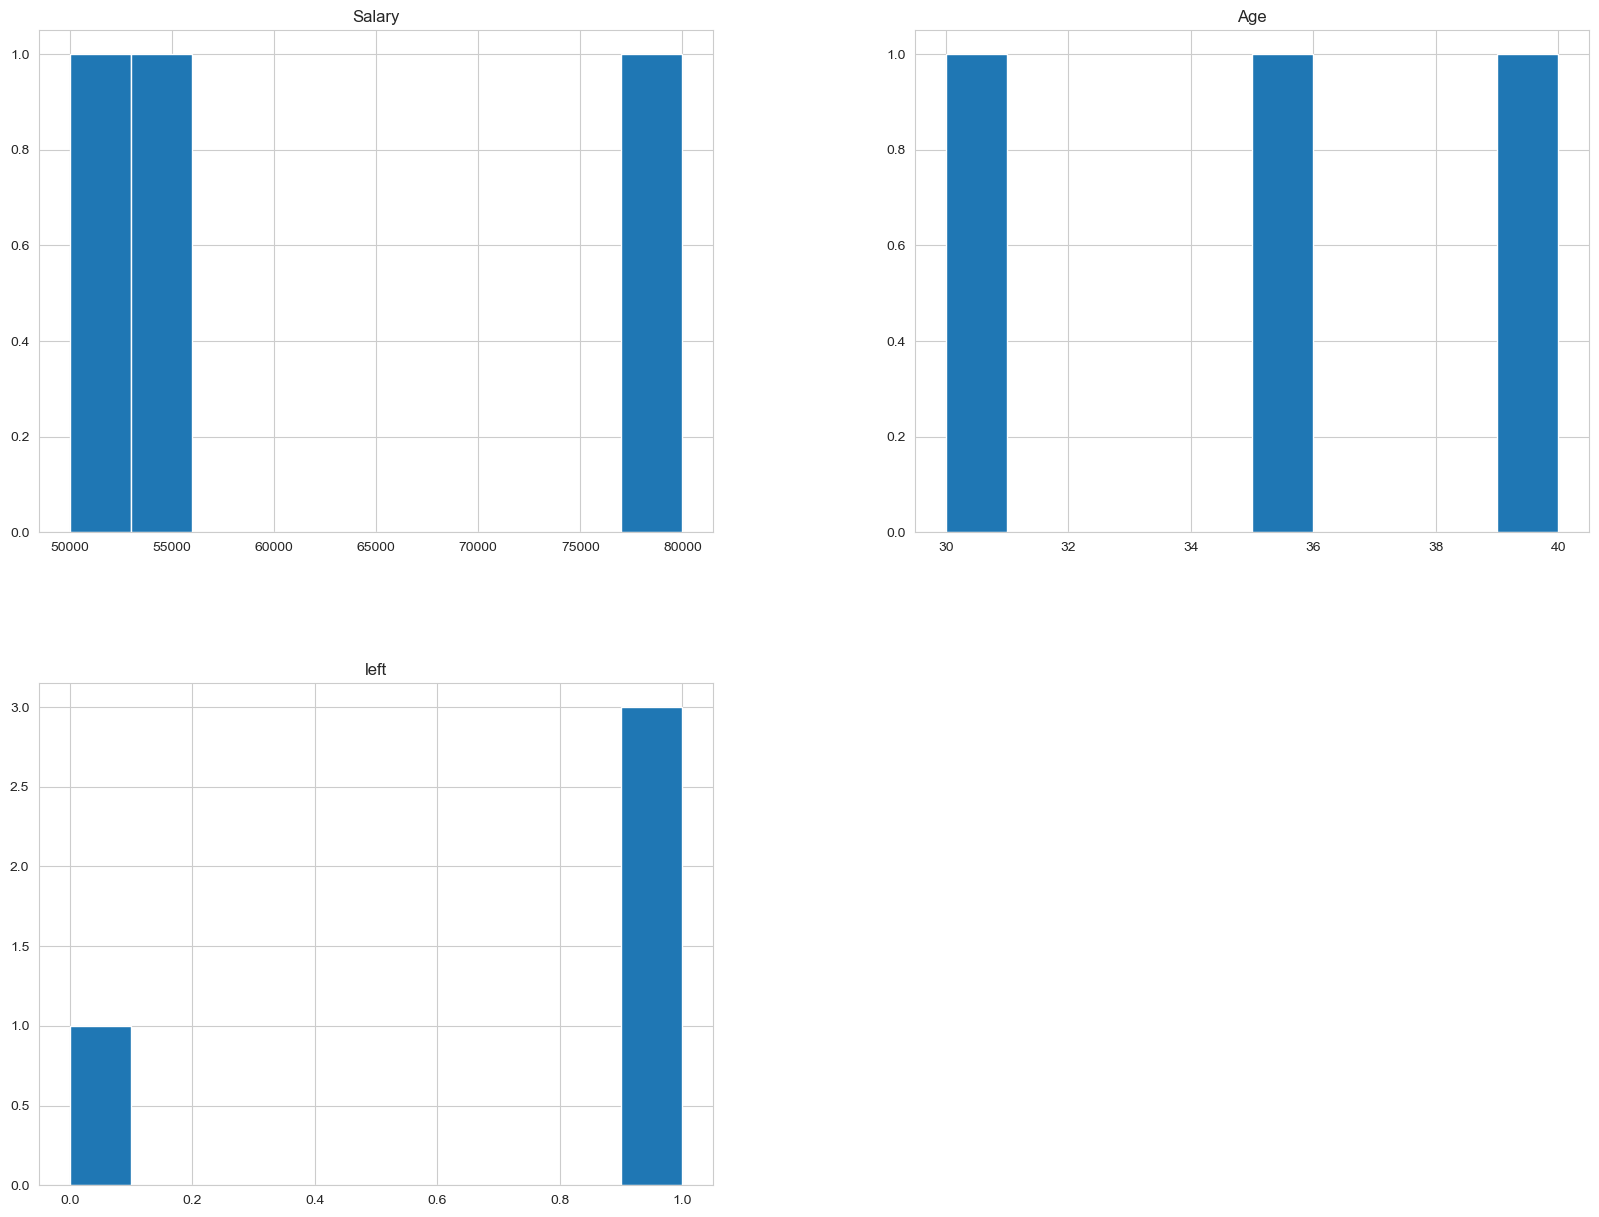

In [44]:
#Histogram of numeric variables
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [45]:
#Proportion of employees left by department
pd.crosstab(hr.Department, hr.left)

left,0,1
Department,,
Engineering,1,1
HR,0,2


In [46]:
hr.head()

,Department,Salary,Age,left
0,HR,50000.0,35.0,1
1,Engineering,80000.0,40.0,0
2,HR,55000.0,30.0,1
3,Engineering,NaN,NaN,1


In [59]:
hr.columns.values


array(['Department', 'Salary', 'Age', 'left', 'Department_Engineering',
       'Department_HR'], dtype=object)

In [60]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [62]:
X

['Department', 'Salary', 'Age', 'Department_Engineering', 'Department_HR']

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Load the dataset
file_path = 'E:/Downloads/employee.csv'  # Update this path to the correct file path
data = pd.read_csv(file_path)

# Feature selection
features = data.drop(columns=['Attrition', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

# Encode categorical variables
categorical_cols = features.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    features[col] = le.fit_transform(features[col])

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Extract target variable
target = le.fit_transform(data['Attrition'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)

# Train models and evaluate using 10-fold cross-validation
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rand_forest,
    'Support Vector Machine': svm,
    'Decision Tree': dec_tree
}

results = {}
for model_name, model in models.items():
    # 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    model.fit(X_train, y_train)  # Fit the model on the training set
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Compute precision, recall, and accuracy
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'cv_scores': cv_scores,
        'mean_cv_score': cv_scores.mean(),
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix
    }

# Display results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"10-fold CV Scores: {result['cv_scores']}")
    print(f"Mean CV Score: {result['mean_cv_score']}")
    print(f"Precision: {result['precision']}")
    print(f"Recall: {result['recall']}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")



Model: Logistic Regression
10-fold CV Scores: [0.81355932 0.87288136 0.87288136 0.86440678 0.86440678 0.83050847
 0.82051282 0.88034188 0.84615385 0.85470085]
Mean CV Score: 0.8520353469506011
Precision: 0.7
Recall: 0.358974358974359
Accuracy: 0.8945578231292517
Confusion Matrix:
[[249   6]
 [ 25  14]]

Model: Random Forest
10-fold CV Scores: [0.8220339  0.86440678 0.8559322  0.88135593 0.83050847 0.83898305
 0.88034188 0.84615385 0.88034188 0.87179487]
Mean CV Score: 0.8571852817615531
Precision: 0.8333333333333334
Recall: 0.1282051282051282
Accuracy: 0.8809523809523809
Confusion Matrix:
[[254   1]
 [ 34   5]]

Model: Support Vector Machine
10-fold CV Scores: [0.8220339  0.86440678 0.84745763 0.86440678 0.84745763 0.8559322
 0.85470085 0.86324786 0.85470085 0.86324786]
Mean CV Score: 0.8537592351151673
Precision: 1.0
Recall: 0.15384615384615385
Accuracy: 0.8877551020408163
Confusion Matrix:
[[255   0]
 [ 33   6]]

Model: Decision Tree
10-fold CV Scores: [0.76271186 0.77118644 0.805084

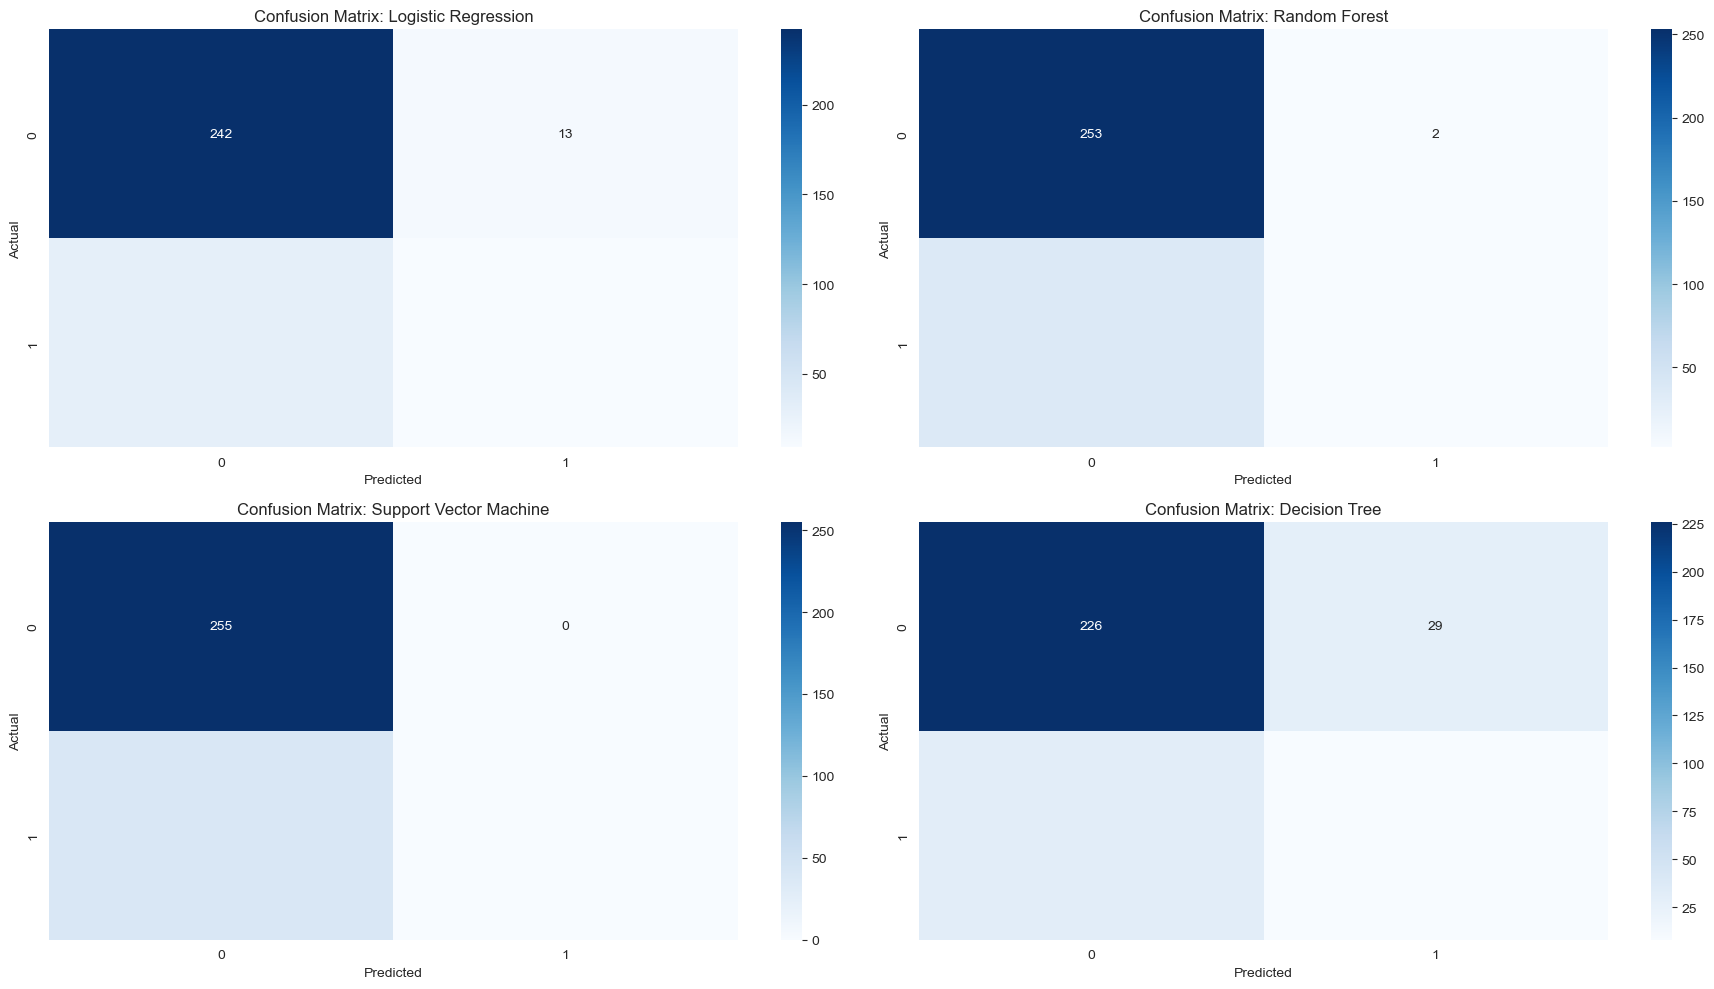

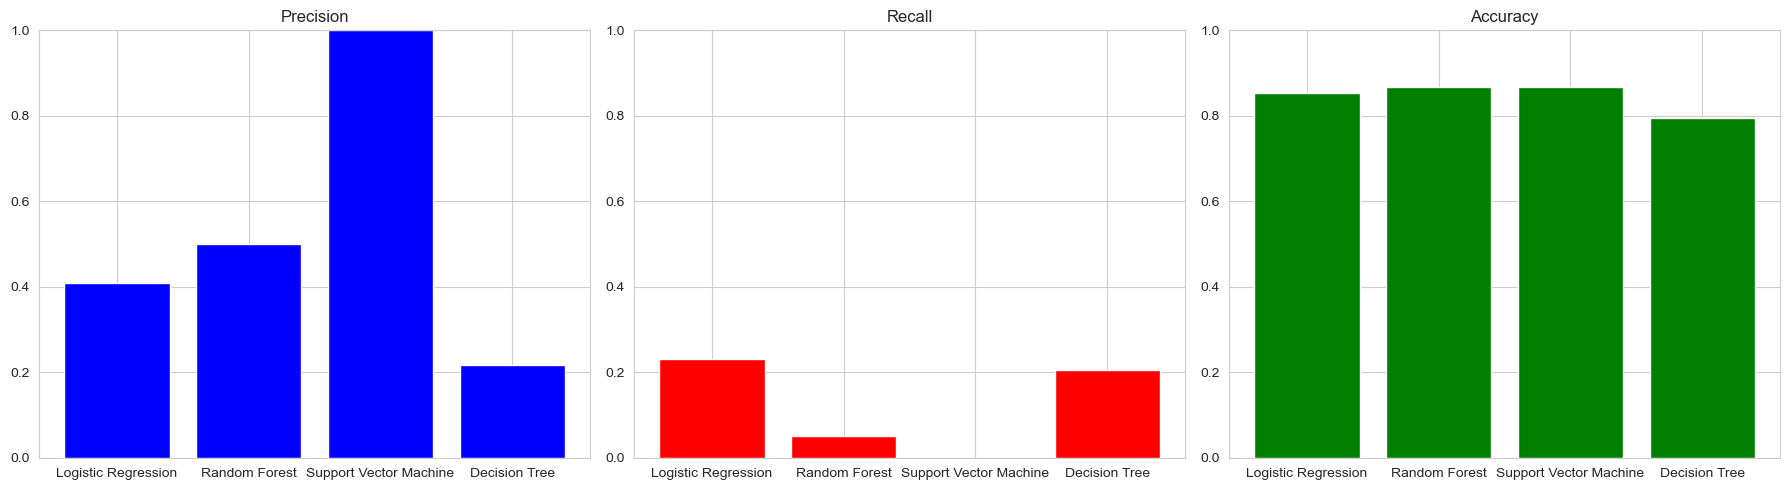

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Load the dataset
file_path = '"E:\Downloads\employee.csv"'  # Update this path to the correct file path
data = pd.read_csv("E:\Downloads\employee.csv")

# Feature selection
features = data.drop(columns=['Attrition', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

# Encode categorical variables
categorical_cols = features.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    features[col] = le.fit_transform(features[col])

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Extract target variable
target = le.fit_transform(data['Attrition'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train models and evaluate using 10-fold cross-validation
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rand_forest,
    'Support Vector Machine': svm,
    'Decision Tree': decision_tree
}

results = {}
for model_name, model in models.items():
    # 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    y_pred = cross_val_predict(model, X_test, y_test, cv=10)
    
    # Compute precision, recall, and accuracy
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'cv_scores': cv_scores,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix
    }

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

for ax, (model_name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot results
model_names = list(results.keys())
precisions = [results[model]['precision'] for model in model_names]
recalls = [results[model]['recall'] for model in model_names]
accuracies = [results[model]['accuracy'] for model in model_names]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar plots for precision, recall, and accuracy
axes[0].bar(model_names, precisions, color='b')
axes[0].set_title('Precision')
axes[0].set_ylim(0, 1)

axes[1].bar(model_names, recalls, color='r')
axes[1].set_title('Recall')
axes[1].set_ylim(0, 1)

axes[2].bar(model_names, accuracies, color='g')
axes[2].set_title('Accuracy')
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()
